<a href="https://colab.research.google.com/github/PradeepCodeD/TransferLearningFiles/blob/main/CodedData/Invalid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1 : Import Libraries

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from PIL import Image
#from matplotlib import image
from numpy import asarray
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt
import numpy as np



# TASK 2 : Clone & Explore dataset

In [2]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 31.06 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [2]:
#set the path to the main dir
import os
main_dir = '/content/datasets/Data'
#set the path to the train dir
train_dir = os.path.join(main_dir,'train')
#set the path to the test dir
test_dir = os.path.join(main_dir,'test')
#set the path to the train norm dir
train_norm_dir = os.path.join(main_dir,'train_normalised')
#os.mkdir(train_norm_dir)
#set the path to the test norm dir
test_norm_dir = os.path.join(main_dir,'test_normalised')
#os.mkdir(test_norm_dir)

#directory with the training covid images
train_covid_dir = os.path.join(train_dir,'COVID19')
train_covid_normalised_dir = os.path.join(train_norm_dir,'COVID19')
#os.mkdir(train_covid_normalised_dir)
#directory with the training normal images
train_normal_dir = os.path.join(train_dir,'NORMAL')
train_normal_normalised_dir = os.path.join(train_norm_dir,'NORMAL')
#os.mkdir(train_normal_normalised_dir)

#directory with the testing covid images
test_covid_dir = os.path.join(test_dir,'COVID19')
test_covid_normalised_dir = os.path.join(test_norm_dir,'COVID19')
#os.mkdir(test_covid_normalised_dir)
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir,'NORMAL')
test_normal_normalised_dir = os.path.join(test_norm_dir,'NORMAL')
#os.mkdir(test_normal_normalised_dir)


In [3]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(103).jpg', 'COVID19(486).jpg', 'COVID19(54).jpg', 'COVID19(428).jpg', 'COVID19(115).jpg', 'COVID19(234).jpg', 'COVID19(71).jpg', 'COVID19(451).jpg', 'COVID19(102).jpg', 'COVID-19 (1).png']
['NORMAL(1269).jpg', 'NORMAL(815).jpg', 'NORMAL(513).jpg', 'NORMAL(562).jpg', 'NORMAL(899).jpg', 'NORMAL(1026).jpg', 'NORMAL(1392).jpg', 'NORMAL(1543).jpg', 'NORMAL(1470).jpg', 'NORMAL(1503).jpg']
['COVID19(315).jpg', 'COVID19(207).jpg', 'COVID19(483).jpg', 'COVID19(465).jpg', 'COVID19(352).jpg', 'COVID-19 (313).jpg', 'COVID19(337).jpg', 'COVID19(216).jpg', 'COVID19(200).jpg', 'COVID19(182).jpg']
['NORMAL(1537).jpg', 'NORMAL(1012).jpg', 'NORMAL(697).jpg', 'NORMAL(1253).jpg', 'NORMAL(835).jpg', 'NORMAL(847).jpg', 'NORMAL(1441).jpg', 'NORMAL(1371).jpg', 'NORMAL(236).jpg', 'NORMAL(355).jpg']


In [4]:
import numpy
directory = train_covid_dir 
length_train_covid = len(train_covid_names)

master_list = []
newcnt = 0


for filename in os.listdir(directory):
    image_file = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(image_file):
        #print(image)
        image = Image.open(image_file)
        new_image = image.resize((400,400),)
        data = asarray(new_image)
        new_array = np.zeros((400,1600),dtype = np.uint8)
        if(data.ndim == 3 and data.shape[2] == 3):
          new_array = np.zeros((400,1200),dtype = np.uint8)
          new_array += data.reshape(data.shape[0],data.shape[1]*data.shape[2])
          dimension_product = data.shape[0]*data.shape[1]*data.shape[2]
        elif(data.ndim == 3 and data.shape[2] == 4):
          new_array = np.zeros((400,1600),dtype = np.uint8)
          new_array += data.reshape(data.shape[0],data.shape[1]*data.shape[2])
          temp_max = data.shape[1]
          dimension_product = data.shape[0]*data.shape[1]*data.shape[2]
        elif(data.ndim == 2):
          new_array = np.zeros((160000),dtype = np.uint8)
          new_array += data.reshape(data.shape[0]*data.shape[1])
          dimension_product = data.shape[0]*data.shape[1]
        else:
          print("the count is ",newcnt)
        
        new_array = new_array.flatten()
        
        if(new_array.shape[0] != 640000):
          new_array.resize(640000)
      
        new_array = np.append(new_array,1)
        new_array = new_array.astype(np.float64)
    
        master_list.append(new_array)
        del new_array
        del data
     
 

print(master_list)        
print(len(master_list))
 



[array([0., 0., 0., ..., 0., 0., 1.]), array([16., 16., 16., ...,  0.,  0.,  1.]), array([39., 35., 36., ...,  0.,  0.,  1.]), array([48., 48., 48., ...,  0.,  0.,  1.]), array([48., 47., 46., ...,  0.,  0.,  1.]), array([184., 184., 184., ...,   0.,   0.,   1.]), array([0., 0., 0., ..., 0., 0., 1.]), array([6., 6., 6., ..., 0., 0., 1.]), array([0., 0., 0., ..., 0., 0., 1.]), array([174., 174., 174., ...,   0.,   0.,   1.]), array([0., 0., 0., ..., 0., 0., 1.]), array([255., 177.,  12., ...,   0.,   0.,   1.]), array([0., 0., 0., ..., 0., 0., 1.]), array([42., 42., 42., ...,  0.,  0.,  1.]), array([59., 59., 59., ...,  0.,  0.,  1.]), array([234., 234., 227., ...,   0.,   0.,   1.]), array([253., 253., 253., ...,   0.,   0.,   1.]), array([58., 68., 66., ...,  0.,  0.,  1.]), array([25., 26., 26., ...,  0.,  0.,  1.]), array([3., 5., 5., ..., 0., 0., 1.]), array([11., 11., 11., ...,  0.,  0.,  1.]), array([1., 4., 2., ..., 0., 0., 1.]), array([101., 101., 101., ...,   0.,   0.,   1.]),

In [5]:
import numpy
directory = train_normal_dir 
length_train_normal = len(train_norm_dir)




# iterate over files in
# that directory
for filename in os.listdir(directory):
    image_file = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(image_file):
        image = Image.open(image_file)
        new_image = image.resize((400,400),)
        data = asarray(new_image)
        new_array = np.zeros((400,1600),dtype = np.uint8)
        if(data.ndim == 3 and data.shape[2] == 3):
          new_array = np.zeros((400,1200),dtype = np.uint8)
          new_array += data.reshape(data.shape[0],data.shape[1]*data.shape[2])
          dimension_product = data.shape[0]*data.shape[1]*data.shape[2]
        elif(data.ndim == 3 and data.shape[2] == 4):
          new_array = np.zeros((400,1600),dtype = np.uint8)
          new_array += data.reshape(data.shape[0],data.shape[1]*data.shape[2])
          temp_max = data.shape[1]
          dimension_product = data.shape[0]*data.shape[1]*data.shape[2]
        elif(data.ndim == 2):
          new_array = np.zeros((160000),dtype = np.uint8)
          new_array += data.reshape(data.shape[0]*data.shape[1])
          dimension_product = data.shape[0]*data.shape[1]
        else:
          print("the count is ",newcnt)
          newcnt += 1
         
        new_array = new_array.flatten()
        
        if(new_array.shape[0] != 640000):
          new_array.resize(640000)

        new_array = np.append(new_array,0)
        new_array = new_array.astype(np.float64)
   
        master_list.append(new_array)
        del new_array

        del data
 
        


        
print(len(master_list))
#print(sample_number)



1811


In [6]:
import numpy
directory = test_covid_dir 
length_train_normal = len(test_covid_dir)
max = 0

count = 0 
index = 0
flag = False
newcnt = 0

# iterate over files in
# that directory
for filename in os.listdir(directory):
    image_file = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(image_file):
        image = Image.open(image_file)
        new_image = image.resize((400,400),)
        data = asarray(new_image)
        new_array = np.zeros((400,1600),dtype = np.uint8)
        if(data.ndim == 3 and data.shape[2] == 3):
          new_array = np.zeros((400,1200),dtype = np.uint8)
          new_array += data.reshape(data.shape[0],data.shape[1]*data.shape[2])
          dimension_product = data.shape[0]*data.shape[1]*data.shape[2]
        elif(data.ndim == 3 and data.shape[2] == 4):
          new_array = np.zeros((400,1600),dtype = np.uint8)
          new_array += data.reshape(data.shape[0],data.shape[1]*data.shape[2])
          temp_max = data.shape[1]
          dimension_product = data.shape[0]*data.shape[1]*data.shape[2]
        elif(data.ndim == 2):
          new_array = np.zeros((160000),dtype = np.uint8)
          new_array += data.reshape(data.shape[0]*data.shape[1])
          dimension_product = data.shape[0]*data.shape[1]
        else:
          print("the count is ",newcnt)
          newcnt += 1
         
        new_array = new_array.flatten()
        
        if(new_array.shape[0] != 640000):
          new_array.resize(640000)

        new_array = np.append(new_array,1)

        new_array = new_array.astype(np.float64)

        master_list.append(new_array)
 
        del new_array

        del data
 


        
print(len(master_list))
#print(sample_number)

1978


In [7]:
import numpy
directory = test_normal_dir 
length_train_normal = len(test_norm_dir)
max = 0

count = 0 
index = 0
flag = False
newcnt = 0

# iterate over files in
# that directory
for filename in os.listdir(directory):
    image_file = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(image_file):
        image = Image.open(image_file)
        new_image = image.resize((400,400),)
        data = asarray(new_image)
        new_array = np.zeros((400,1600),dtype = np.uint8)
        if(data.ndim == 3 and data.shape[2] == 3):
          new_array = np.zeros((400,1200),dtype = np.uint8)
          new_array += data.reshape(data.shape[0],data.shape[1]*data.shape[2])
          dimension_product = data.shape[0]*data.shape[1]*data.shape[2]
        elif(data.ndim == 3 and data.shape[2] == 4):
          new_array = np.zeros((400,1600),dtype = np.uint8)
          new_array += data.reshape(data.shape[0],data.shape[1]*data.shape[2])
          temp_max = data.shape[1]
          dimension_product = data.shape[0]*data.shape[1]*data.shape[2]
        elif(data.ndim == 2):
          new_array = np.zeros((160000),dtype = np.uint8)
          new_array += data.reshape(data.shape[0]*data.shape[1])
          dimension_product = data.shape[0]*data.shape[1]
        else:
          print("the count is ",newcnt)
          newcnt += 1
         
        new_array = new_array.flatten()
        
        if(new_array.shape[0] != 640000):
          new_array.resize(640000)

        new_array = np.append(new_array,0)
        new_array = new_array.astype(np.float64)

     
        master_list.append(new_array)
        
        
        del new_array
 
       
        del data 
 
   


        
print(len(master_list))

2295


In [6]:
array_recombined = np.vstack(master_list)
print(array_recombined)
master_list.clear()
del master_list

[[  0.   0.   0. ...   0.   0.   1.]
 [ 16.  16.  16. ...   0.   0.   1.]
 [ 39.  35.  36. ...   0.   0.   1.]
 ...
 [ 77.  92.  91. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [ 64.  82. 104. ...   0.   0.   0.]]


In [7]:
index_names = []
feature_names = []
for i in range (1,1812):
  index_names.append("sample "+str(i))
for i in range (1,640002):
  feature_names.append("feature "+str(i))



df = pd.DataFrame(array_recombined,index = (index_names),columns = (feature_names))
print(df)
index_names.clear()
feature_names.clear()
del array_recombined
del index_names
del feature_names
#array_meannormalised = array_recombined - np.mean(array_recombined,axis=1)

             feature 1  feature 2  feature 3  feature 4  feature 5  feature 6  \
sample 1           0.0        0.0        0.0        0.0        0.0        0.0   
sample 2          16.0       16.0       16.0       17.0       17.0       17.0   
sample 3          39.0       35.0       36.0       38.0       34.0       35.0   
sample 4          48.0       48.0       48.0       62.0       62.0       62.0   
sample 5          48.0       47.0       46.0       47.0       47.0       47.0   
...                ...        ...        ...        ...        ...        ...   
sample 1807        0.0        0.0        0.0        0.0        0.0        1.0   
sample 1808       10.0       11.0        9.0       15.0       21.0       22.0   
sample 1809       77.0       92.0       91.0       93.0       93.0       91.0   
sample 1810        0.0        0.0        0.0        0.0        0.0        5.0   
sample 1811       64.0       82.0      104.0      125.0      140.0      154.0   

             feature 7  fea

In [8]:
df['feature 640001'].value_counts()


0.0    1266
1.0     545
Name: feature 640001, dtype: int64

In [9]:
from numpy.core.fromnumeric import std
#std_array = np.zeros((640000,1))
#mean_array = np.zeros((640000,1))
for i in range (0,len(df.columns)-1):
  df.iloc[:,i] = (df.iloc[:,i] - df.iloc[:,i].mean()) / df.iloc[:,i].std()
  print(i)
 # std_array[i,0]=  df.iloc[:,i].std()
 # mean_array[i,0]=  df.iloc[:,i].mean()

#print(std_array)
#print(mean_array)

print(df)

Streaming output truncated to the last 5000 lines.
635066
635067
635068
635069
635070
635071
635072
635073
635074
635075
635076
635077
635078
635079
635080
635081
635082
635083
635084
635085
635086
635087
635088
635089
635090
635091
635092
635093
635094
635095
635096
635097
635098
635099
635100
635101
635102
635103
635104
635105
635106
635107
635108
635109
635110
635111
635112
635113
635114
635115
635116
635117
635118
635119
635120
635121
635122
635123
635124
635125
635126
635127
635128
635129
635130
635131
635132
635133
635134
635135
635136
635137
635138
635139
635140
635141
635142
635143
635144
635145
635146
635147
635148
635149
635150
635151
635152
635153
635154
635155
635156
635157
635158
635159
635160
635161
635162
635163
635164
635165
635166
635167
635168
635169
635170
635171
635172
635173
635174
635175
635176
635177
635178
635179
635180
635181
635182
635183
635184
635185
635186
635187
635188
635189
635190
635191
635192
635193
635194
635195
635196
635197
635198
635199
635200
6352

In [10]:
Y = df["feature 640001"]
df = df.drop("feature 640001",axis=1)


In [ ]:
 from sklearn.model_selection import train_test_split

 X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=1)
 del X
 del Y

In [ ]:
#print the total no of images present in each dir
print("Total images present in the training set:",len(train_covid_names+train_normal_names))
print("Total images present in the testing set:",len(test_covid_names+test_normal_names))


Total images present in the training set: 1811
Total images present in the testing set: 484


# TASK 3 : Data Visualization

['/content/datasets/Data/train_normalised/COVID19/COVID19(103).jpg', '/content/datasets/Data/train_normalised/COVID19/COVID19(486).jpg', '/content/datasets/Data/train_normalised/COVID19/COVID19(54).jpg', '/content/datasets/Data/train_normalised/COVID19/COVID19(428).jpg', '/content/datasets/Data/train_normalised/COVID19/COVID19(115).jpg', '/content/datasets/Data/train_normalised/COVID19/COVID19(234).jpg', '/content/datasets/Data/train_normalised/COVID19/COVID19(71).jpg', '/content/datasets/Data/train_normalised/COVID19/COVID19(451).jpg']      ['/content/datasets/Data/train/NORMAL/NORMAL(1269).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(815).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(513).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(562).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(899).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1026).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1392).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1543).jpg']


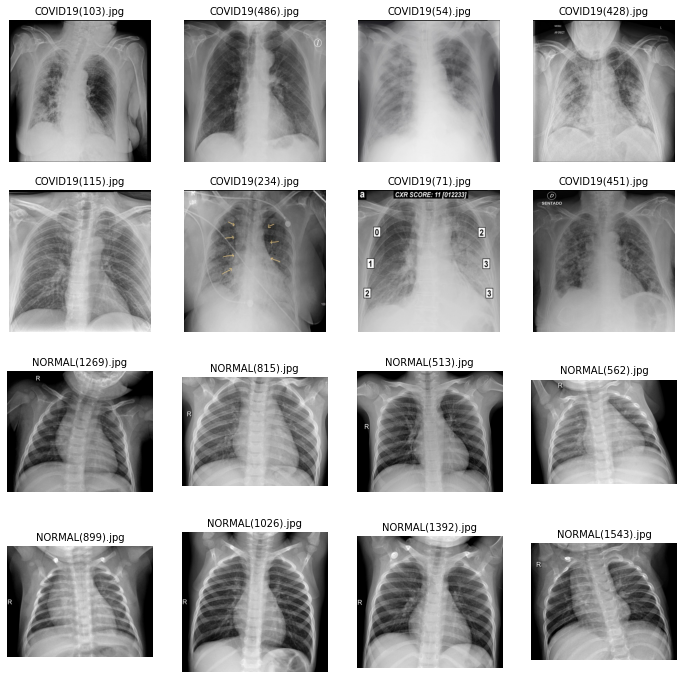

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg


#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_normalised_dir,filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir,filename) for filename in train_normal_names[0:8]]
#print the list
print(covid_pic,'    ',normal_pic)
#merge the covid and normal list
merged_list = covid_pic + normal_pic
for i,img_path in enumerate(merged_list):
  data = img_path.split('/',)[-1]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize = 10)
  plt.imshow(img,cmap='gray')

plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [1]:
dgen_train = ImageDataGenerator(samplewise_std_normalization=True,
                                samplewise_center=True,
                                rotation_range=20,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_test = ImageDataGenerator(samplewise_std_normalization=True,
                                samplewise_center=True,
                                rotation_range=20,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

seed = 1

train_generator = dgen_train.flow_from_directory(
    train_dir,
    target_size = (300,300),
    subset = 'training',
    batch_size = 32,
    class_mode = 'binary',
    seed=seed)

validation_generator = dgen_train.flow_from_directory(
    train_dir,
    target_size = (300,300),
    subset = 'validation',
    batch_size = 32,
    class_mode = 'binary',
    seed=seed)

test_generator = dgen_test.flow_from_directory(
    test_dir,
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary',
    seed=seed)



NameError: ignored

In [ ]:
# generate training,testing and validation batches 
data_gen_args_train = dict(featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range=90,
                     width_shift_range=0.1,
                     validation_split = 0.2,
                     height_shift_range=0.1,
                     zoom_range=0.2,
                     horizontal_flip = True)

data_gen_args_val = dict(featurewise_center=True,
                                featurewise_std_normalization=True)

data_gen_args_test = dict(featurewise_center=True,
                                featurewise_std_normalization=True)

image_datagen_train = ImageDataGenerator(**data_gen_args_train)
image_datagen_val = ImageDataGenerator(**data_gen_args_val)
image_datagen_test = ImageDataGenerator(**data_gen_args_test)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1

image_datagen_train.fit(train_norm_dir, augment=True, seed=seed)
image_datagen_val.fit(train_norm_dir, augment=True, seed=seed)
image_datagen_test.fit(test_norm_dir, augment=True, seed=seed)



In [ ]:
"""
dgen_train = ImageDataGenerator(samplewise_std_normalization=True,
                                #samplewise_center=True,
                                rotation_range=20,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)


#https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_directory/
dgen_validation = ImageDataGenerator(samplewise_std_normalization=True)
dgen_test = ImageDataGenerator(samplewise_std_normalization=True)

train_generator = dgen_train.flow_from_directory(train_dir, 
                                                 target_size = (128,128),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir, 
                                                 target_size = (128,128),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir, 
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

In [ ]:
train_generator.white_list_formats


('png', 'jpg', 'jpeg', 'bmp', 'ppm', 'tif', 'tiff')

In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape

(128, 128, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [ ]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
# pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten layer
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

# TASK 6 : Compile & Train the Model

In [ ]:
#compile the model
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
#train the model
history = model.fit(train_generator,
                    epochs = 5,
                    validation_data = validation_generator)

Epoch 1/5


InvalidArgumentError: ignored

# TASK 7 : Performance Evaluation

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epochs')

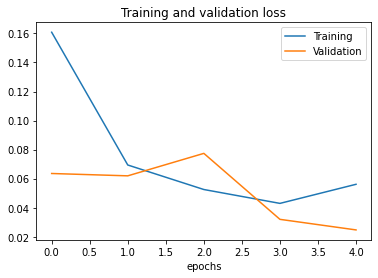

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

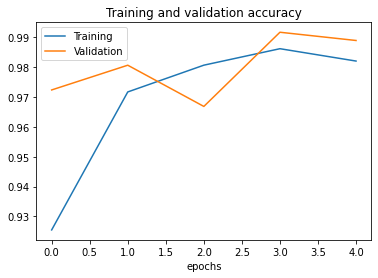

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [ ]:
# get the test acuarcy and loss
test_loss, test_accuracy = custom_model.evaluate(test_generator)
print('test loss : {} test acc : {}'.format(test_loss,test_accuracy))


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


16/16 [==============================] - 13s 783ms/step - loss: 0.0365 - accuracy: 0.9814
test loss : 0.03651377931237221 test acc : 0.9814049601554871


# TASK 8 : Prediction On New Data

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename 
  img = image.load_img(img_path,target_size= (128,128))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis = 0)
  prediction = custom_model.predict(images)
  print(filename)


  if prediction == 0:
    print('Covid detected')
  else:
    print('Your report is normal')



Saving NORMAL(10).jpeg to NORMAL(10).jpeg
NORMAL(10).jpeg
Your report is normal


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mnet = MobileNetV2(include_top = False, pooling = 'avg', weights = 'imagenet',
                    input_shape = (128,128,3))
mnet.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [ ]:
def create_model():
  new_model = Sequential([
                          mnet,
                          Flatten(),
                          Dropout(0.5),
                          Dense(1,activation='sigmoid'),
                          ])
  new_model.layers[0].trainable = False
  new_model.compile(Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = 'accuracy')
  
  return new_model

custom_model = create_model()
custom_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
history = custom_model.fit(train_generator,
                    epochs = 5,
                    validation_data = validation_generator)

Epoch 1/5
46/46 [==============================] - 12s 216ms/step - loss: 0.3866 - accuracy: 0.8302 - val_loss: 0.1796 - val_accuracy: 0.9171
Epoch 2/5
46/46 [==============================] - 9s 195ms/step - loss: 0.1619 - accuracy: 0.9379 - val_loss: 0.1095 - val_accuracy: 0.9530
Epoch 3/5
46/46 [==============================] - 9s 197ms/step - loss: 0.1278 - accuracy: 0.9614 - val_loss: 0.0919 - val_accuracy: 0.9807
Epoch 4/5
46/46 [==============================] - 9s 195ms/step - loss: 0.1017 - accuracy: 0.9655 - val_loss: 0.0842 - val_accuracy: 0.9724
Epoch 5/5
46/46 [==============================] - 9s 199ms/step - loss: 0.0881 - accuracy: 0.9731 - val_loss: 0.0870 - val_accuracy: 0.9696


In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3

effnet = EfficientNetB0(include_top = False, pooling = 'avg', weights = 'imagenet',
                    input_shape = (300,300,3))

effnet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 300, 300, 3)  0           ['input_6[0][0]']                
                                                                                                  
 normalization_3 (Normalization  (None, 300, 300, 3)  7          ['rescaling_3[0][0]']            
 )                                                                                                
                                                                                     

In [ ]:
def create_model():
  #new_model = Sequential([
  #                        effnet,
  #                        Flatten(),
  #                        Dropout(0.5),
  #                        Dense(1,activation='sigmoid'),
  #                        ])
  new_model = Sequential([
                          effnet,
                          Flatten(),
                          Dense(256,activation='relu'),
                          Dropout(0.2),
                          Dense(256,activation='relu'),
                          Dropout(0.2),
                          Dense(256,activation='relu'),
                          Dropout(0.2),
                          Dense(1,activation='sigmoid')])
                        
  new_model.layers[0].trainable = False
  new_model.compile(Adam(learning_rate=0.002), loss = 'binary_crossentropy', metrics = 'accuracy')
  
  return new_model

custom_model = create_model()
custom_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 flatten_4 (Flatten)         (None, 1280)              0         
                                                                 
 dense_13 (Dense)            (None, 256)               327936    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 256)              

In [ ]:
history = custom_model.fit(train_generator,
                    epochs = 10,
                    validation_data = validation_generator)

Epoch 1/10
46/46 [==============================] - 37s 799ms/step - loss: 0.6164 - accuracy: 0.6991 - val_loss: 0.6110 - val_accuracy: 0.6989
Epoch 2/10
46/46 [==============================] - 34s 750ms/step - loss: 0.6201 - accuracy: 0.6991 - val_loss: 0.6276 - val_accuracy: 0.6989
Epoch 3/10
46/46 [==============================] - 34s 745ms/step - loss: 0.6155 - accuracy: 0.6991 - val_loss: 0.6112 - val_accuracy: 0.6989
Epoch 4/10
46/46 [==============================] - 34s 747ms/step - loss: 0.6185 - accuracy: 0.6991 - val_loss: 0.6108 - val_accuracy: 0.6989
Epoch 5/10
46/46 [==============================] - 34s 743ms/step - loss: 0.6156 - accuracy: 0.6991 - val_loss: 0.6191 - val_accuracy: 0.6989
Epoch 6/10
46/46 [==============================] - 34s 748ms/step - loss: 0.6193 - accuracy: 0.6991 - val_loss: 0.6106 - val_accuracy: 0.6989
Epoch 7/10
46/46 [==============================] - 34s 744ms/step - loss: 0.6261 - accuracy: 0.6991 - val_loss: 0.6114 - val_accuracy: 0.6989

In [ ]:
from PIL import Image
from numpy import asarray
  
  
# load the image and convert into 
# numpy array
img = Image.open('/content/datasets/Data/train/COVID19/COVID-19 (1).jpeg')
img2 = Image.open('/content/datasets/Data/train_normalised/COVID19/COVID-19 (1).jpeg')
numpydata = asarray(img)
numpydata1 = asarray(img2)

  
# data
print("1 ....",numpydata)
print("2 ....",numpydata1)



1 .... [[  0   1   3 ...   0   0   0]
 [  0   1   3 ...   0   0   0]
 [  0   1   2 ...   0   0   0]
 ...
 [219 218 218 ... 154 146 139]
 [219 218 218 ... 155 146 139]
 [219 218 218 ... 155 147 139]]
2 .... [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [219 216 217 ... 164 155 144]
 [219 217 217 ... 166 157 145]
 [218 217 218 ... 168 158 145]]
